In [2]:
from analitico import disponibilidade_vec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# gerar dados com combinações de valores de n, k e p
n = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
k = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
p = np.linspace(0, 1, 100)
dados = pd.DataFrame(
    [(ni, ki, pi) for ni in n for ki in k for pi in p if ki <= ni],  # escolhendo combinações de n, k e p em que k <= n
    columns=["n", "k", "p"],
)
dados["d"] = disponibilidade_vec(dados["n"], dados["k"], dados["p"])
dados

(5500,) (5500,) (5500,)


,n,k,p,d
0,1,1,0.000000,0.000000
1,1,1,0.010101,0.010101
2,1,1,0.020202,0.020202
3,1,1,0.030303,0.030303
4,1,1,0.040404,0.040404
...,...,...,...,...
5495,10,10,0.959596,0.662040
5496,10,10,0.969697,0.735124
5497,10,10,0.979798,0.815390
5498,10,10,0.989899,0.903460


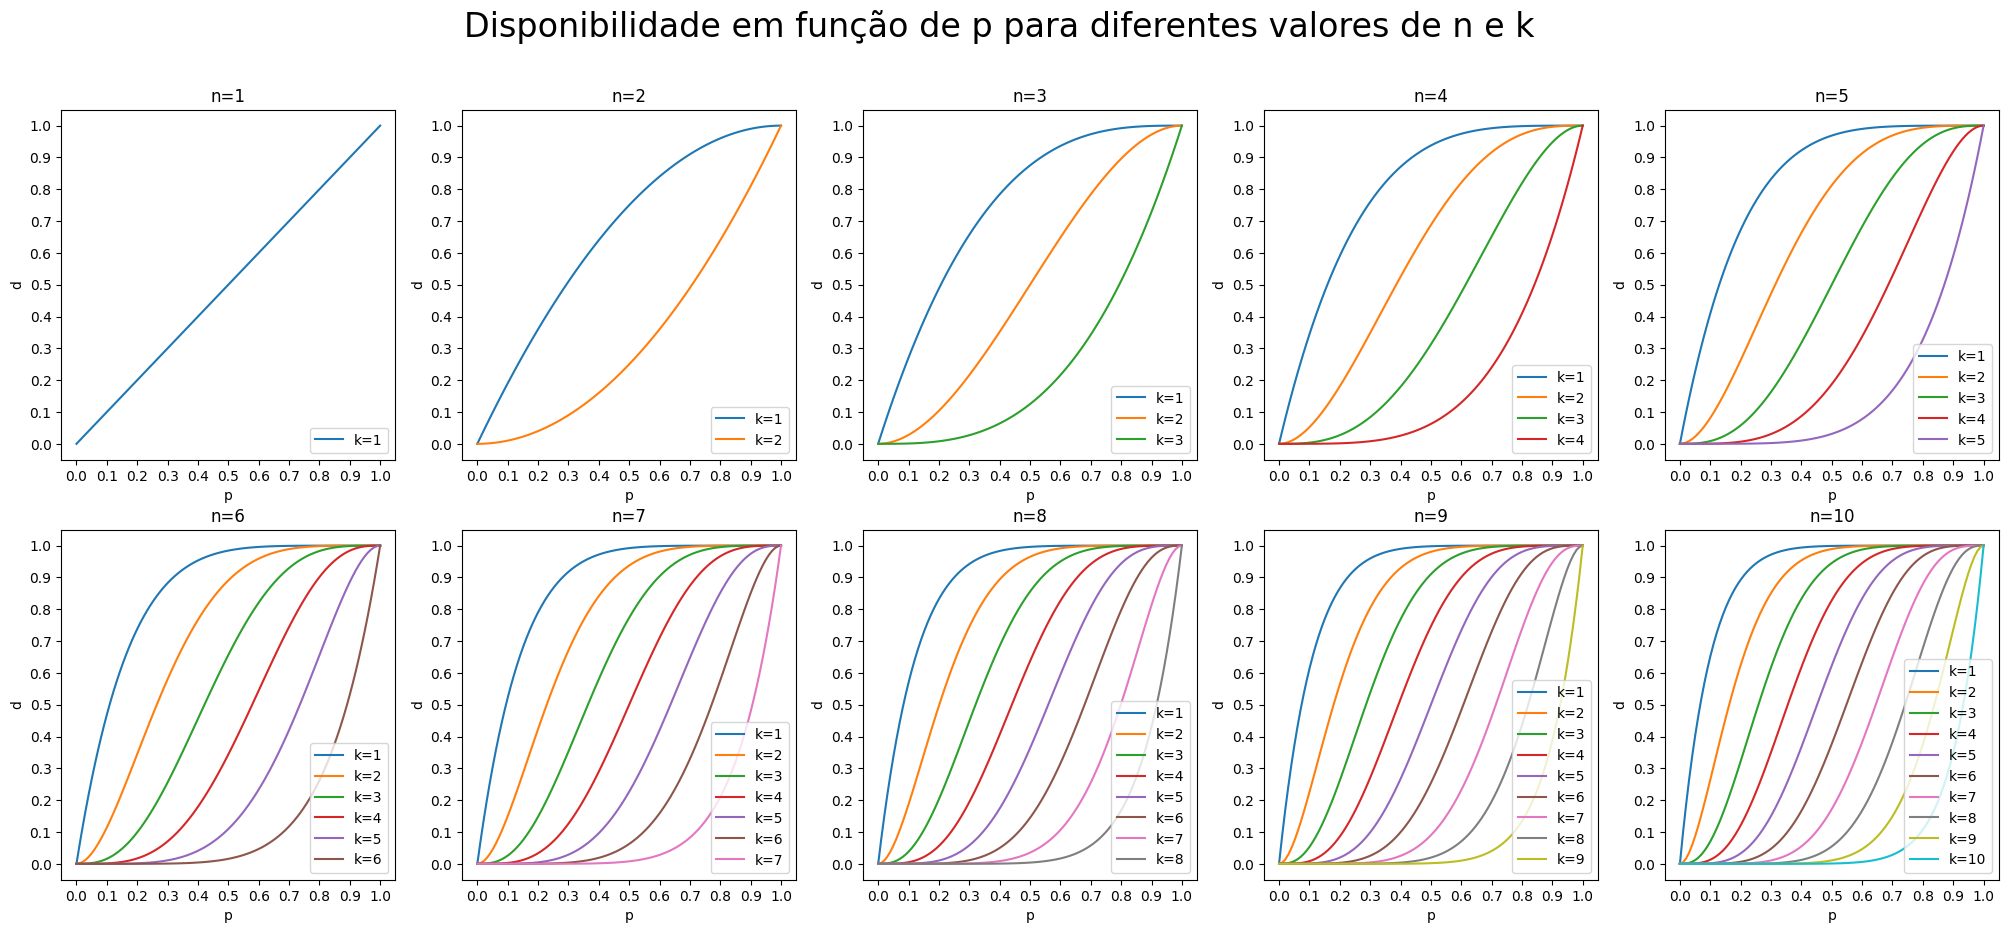

In [6]:
plt.figure(figsize=(25, 10))
plt.suptitle('Disponibilidade em função de p para diferentes valores de n e k', fontsize=24)
# plotar resultados em p vs d para diferentes valores de n e k
for ni in n:
    plt.subplot(2, 5, ni)
    for ki in k:
        if ki <= ni:
            subset = dados[(dados["n"] == ni) & (dados["k"] == ki)]
            plt.plot(subset["p"], subset["d"], label=f'k={ki}')
            plt.title(f'n={ni}')
            plt.xlabel('p')
            plt.ylabel('d')
            plt.xticks(np.arange(0, 1.1, 0.1))
            plt.yticks(np.arange(0, 1.1, 0.1))
            plt.legend(loc='lower right')
plt.show()